# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

         flight_day  wants_extra_baggage  wants_preferred_seat  \
count  50000.000000         50000.000000          50000.000000   
mean       3.814420             0.668780              0.296960   
std        1.992792             0.470657              0.456923   
min        1.000000             0.000000              0.000000   
25%        2.000000             0.000000              0.000000   
50%        4.000000             1.000000              0.000000   
75%        5.000000             1.000000              1.000000   
max        7.000000             1.000000              1.000000   

       wants_in_flight_meals  flight_duration  booking_complete  
count           50000.000000     50000.000000      50000.000000  
mean                0.427140         7.277561          0.149560  
std                 0.494668         1.496863          0.356643  
min                 0.000000         4.670000          0.000000  
25%                 0.000000         5.620000          0.000000  
50%                 0.000000         7.570000          0.000000  
75%                 1.000000         8.830000          0.000000  
max                 1.000000         9.500000          1.000000

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [12]:
print(df["route"].unique())
print(df["route"].nunique())

['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'CGKOOL'
 'CGKPEK' 'CGKPER' 'CGKPUS' 'CGKPVG' 'CGKSYD' 'CGKT

In [13]:
df['origin'] = df['route'].str[:3]
df['destination'] = df['route'].str[-3:]

In [15]:
print('number of origin places:',df["origin"].nunique())
print('number of destination places:',df["destination"].nunique())

number of origin places: 85
number of destination places: 64


array([[<Axes: title={'center': 'purchase_lead'}>]], dtype=object)

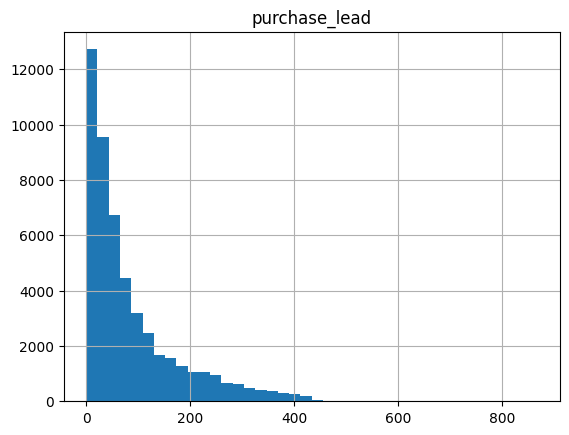

In [16]:
df[['purchase_lead']].hist(bins=40)

array([[<Axes: title={'center': 'flight_hour'}>]], dtype=object)

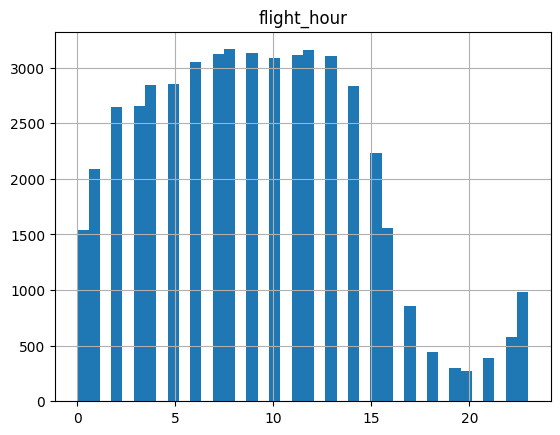

In [17]:
df[['flight_hour']].hist(bins=40)

array([[<Axes: title={'center': 'flight_duration'}>]], dtype=object)

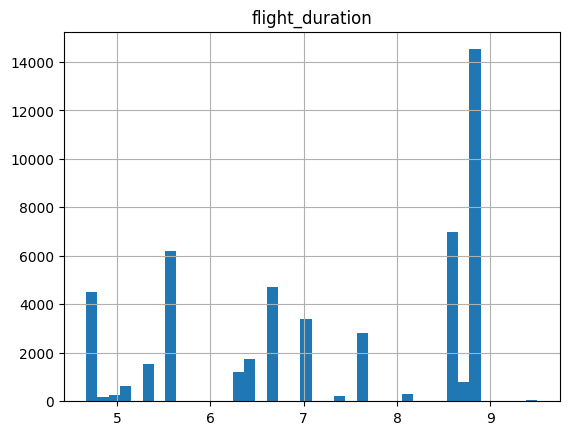

In [18]:
df[['flight_duration']].hist(bins=40)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

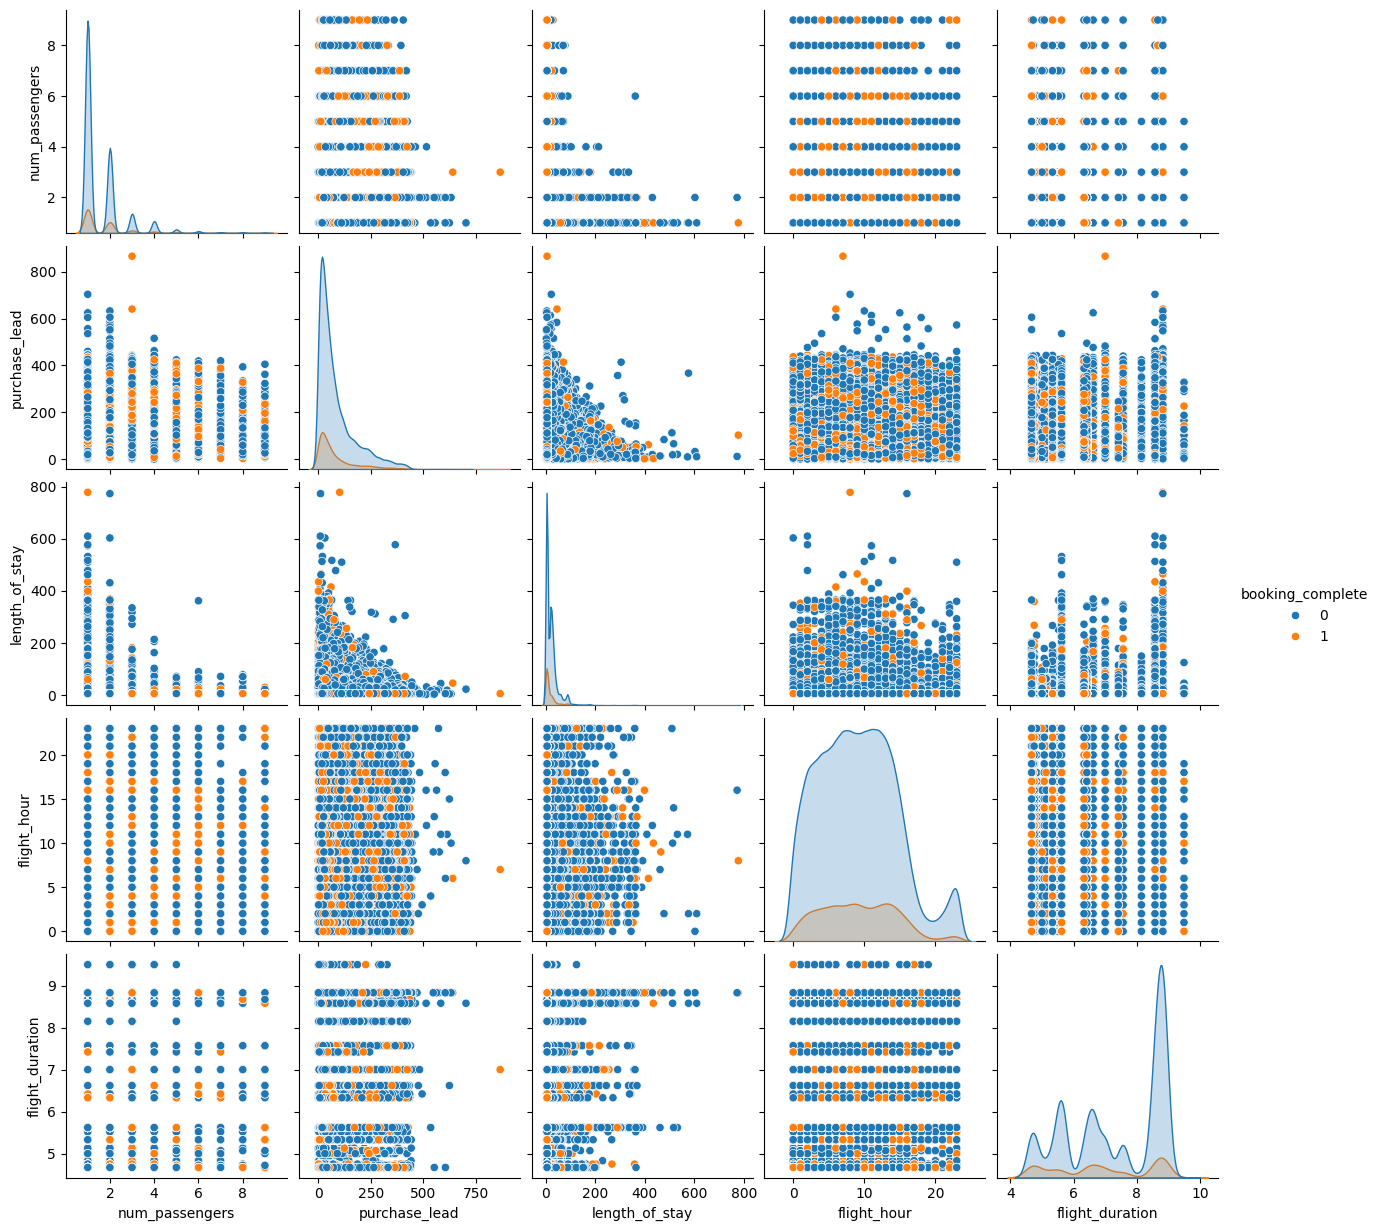

In [20]:
continuous_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
sns.pairplot(df[continuous_columns + ['booking_complete']], hue='booking_complete', diag_kind='kde')
plt.show()

In [21]:
import plotly.express as px
import plotly.subplots as sp

In [22]:
# Define the categorical columns you want to visualize
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 
                       'booking_complete', 'wants_extra_baggage', 
                       'wants_preferred_seat', 'wants_in_flight_meals']

# Create a subplot for the pie charts
fig = sp.make_subplots(
    rows=4, cols=2, 
    subplot_titles=categorical_columns,
    specs=[[{'type': 'pie'}] * 2] * 4,  # Define the type for each subplot
    vertical_spacing=0.1  # Adjust for better spacing
)

# Iterate over each categorical column and add a pie chart to the subplot
for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts().reset_index()
    counts.columns = ['category', 'count']
    
    fig.add_trace(
        px.pie(
            counts, 
            values='count', 
            names='category',
            hole=0.4  # Optional: to make it a donut chart
        ).data[0],  # Add the data from the created plot
        row=(i // 2) + 1, col=(i % 2) + 1
    )

# Update layout for titles and spacing
fig.update_layout(
    title_text='Distribution of Categorical Features',
    height=800, width=800
)

# Update traces for all to include counts in the hovertemplate
fig.update_traces(
    textinfo='percent+label', 
    hovertemplate='%{label}: %{percent} (%{value})'
)

# Show the plot
fig.show()

<Axes: xlabel='sales_channel', ylabel='count'>

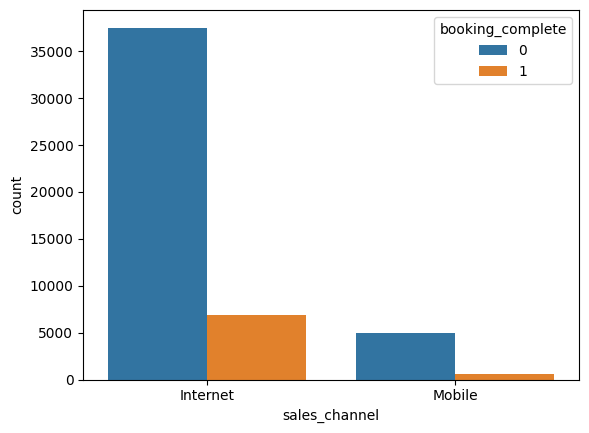

In [23]:
sns.countplot(x='sales_channel', hue='booking_complete', data=df)

In [24]:
from sklearn import preprocessing

In [25]:
cat_cols = ['sales_channel', 'trip_type', 'booking_origin', 'origin', 'destination']

In [26]:
le = preprocessing.LabelEncoder()

In [27]:
df_encoded = df.copy()

In [28]:
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

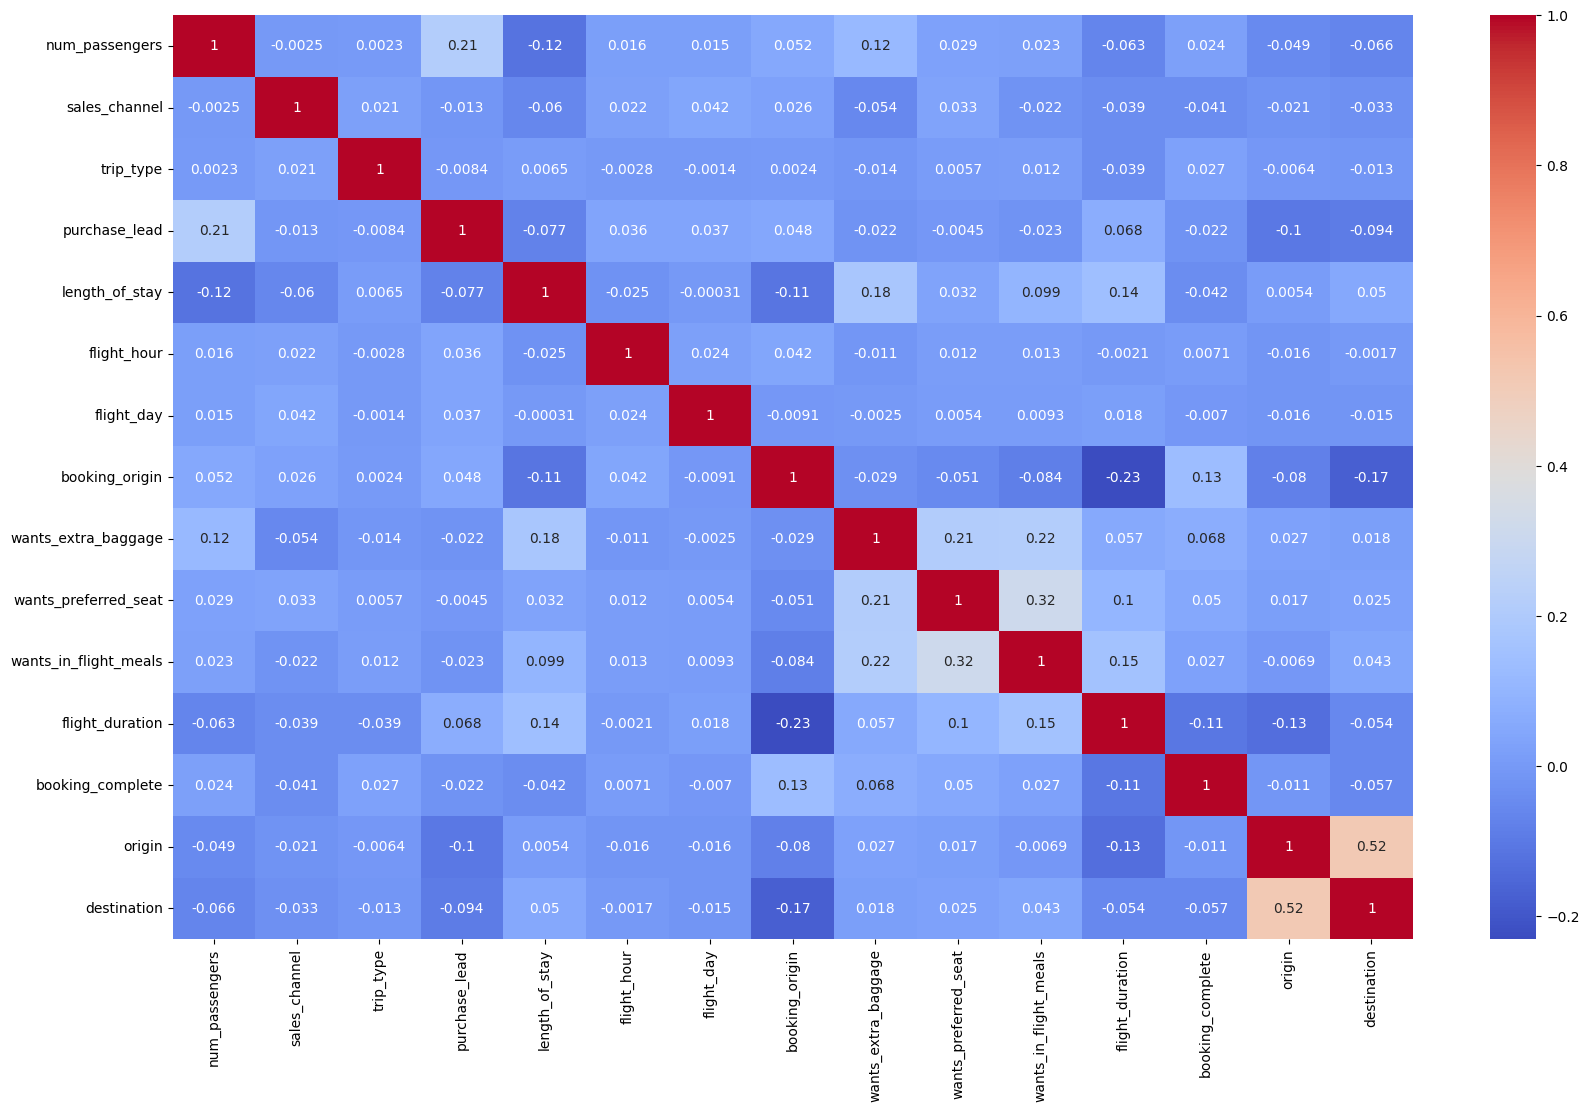

In [32]:
plt.figure(figsize=(20, 12))
corr = sns.heatmap(df_encoded.drop('route', axis=1).corr(), annot=True, cmap='coolwarm')

In [33]:
X = df_encoded.drop(['booking_complete', 'route'], axis=1)
y = df_encoded['booking_complete']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
continuous_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [40]:
rfc = RandomForestClassifier()

In [41]:
cv_scores = cross_val_score(rfc, X, y, cv=4, scoring='f1')

In [42]:
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean F1: {cv_scores.mean():.4f}')
print(f'Standard deviation: {cv_scores.std():.4f}')

Cross-validation scores: [0.00213333 0.13268096 0.13227328 0.26633955]
Mean F1: 0.1334
Standard deviation: 0.0934


In [43]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = rf_classifier.predict(X_test)

In [45]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10537
           1       0.55      0.11      0.18      1963

    accuracy                           0.85     12500
   macro avg       0.70      0.55      0.55     12500
weighted avg       0.81      0.85      0.80     12500



In [46]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

In [47]:
sorted_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f'{feature}: {importance:.4f}')

purchase_lead: 0.1868
flight_hour: 0.1401
length_of_stay: 0.1231
booking_origin: 0.1004
origin: 0.1004
flight_day: 0.0914
destination: 0.0782
flight_duration: 0.0556
num_passengers: 0.0508
wants_in_flight_meals: 0.0246
wants_preferred_seat: 0.0184
wants_extra_baggage: 0.0165
sales_channel: 0.0122
trip_type: 0.0016


C:\Users\shrey\AppData\Local\Temp\ipykernel_20552\717116274.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




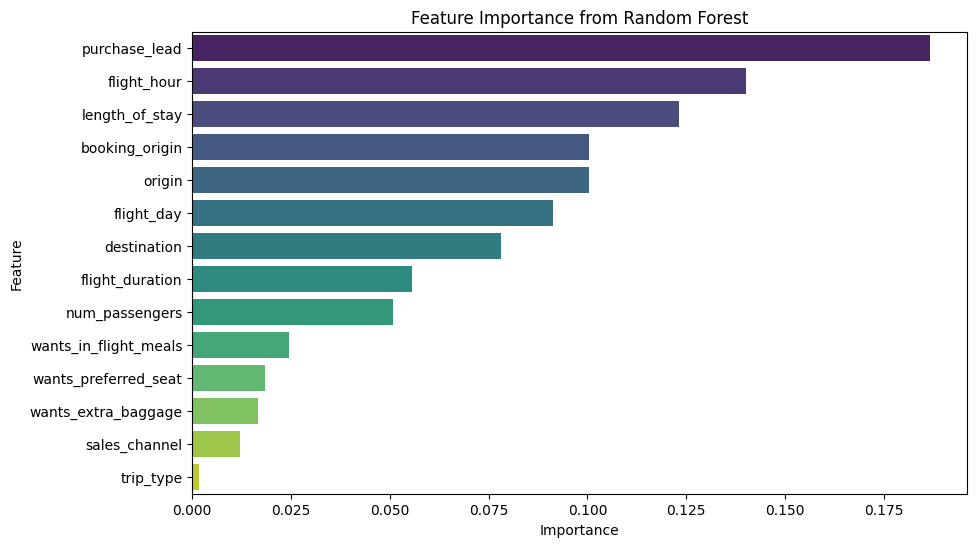

In [48]:
# Create a DataFrame for better sorting and visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()

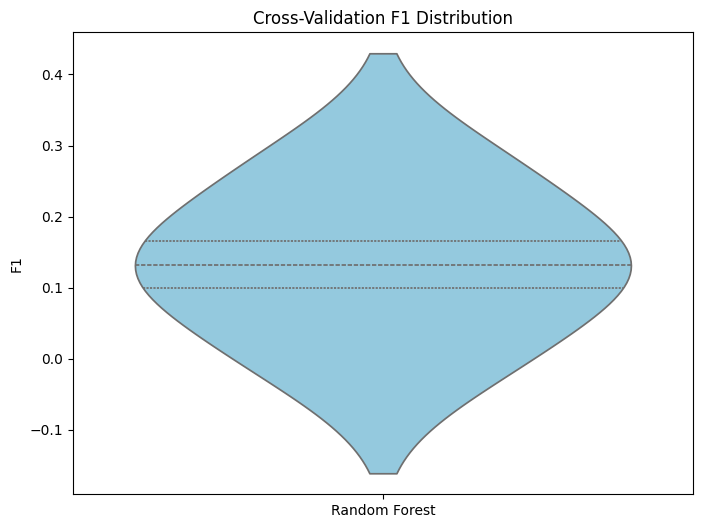

In [49]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=cv_scores, inner='quartile', color='skyblue')
plt.title('Cross-Validation F1 Distribution')
plt.ylabel('F1')
plt.xticks([0], ['Random Forest'])
plt.show()

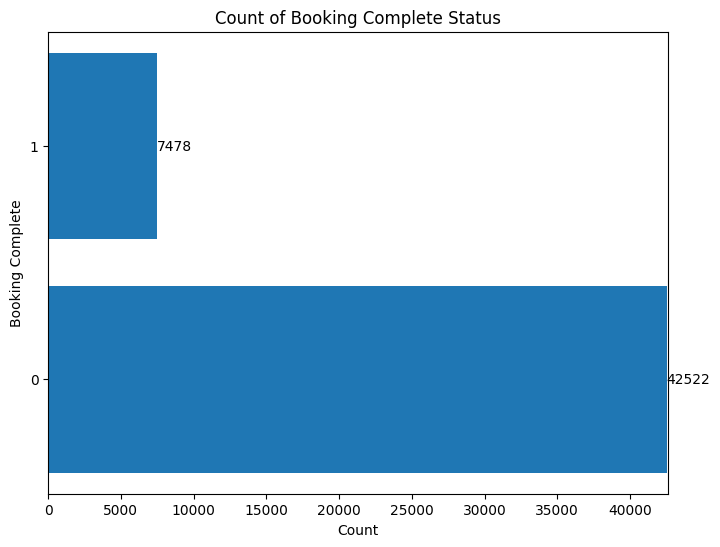

In [50]:
# Count the occurrences in the booking_complete column
booking_counts = df['booking_complete'].value_counts()

# Horizontal bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(booking_counts.index.astype(str), booking_counts.values)  # Convert index to string for better labeling

for bar in bars:
    plt.text(bar.get_width()+2, bar.get_y() + bar.get_height() / 2, 
             bar.get_width(), va='center')  # Place the text slightly to the right of the bar

# Labels and title
plt.xlabel('Count')
plt.ylabel('Booking Complete')
plt.title('Count of Booking Complete Status')
plt.xlim(0, booking_counts.max() + 100)  # Add some space for better visibility of labels
plt.show()

Since the dataset is highly imbalanced, the model is not able to learn well, and the F1 scores are low.